### Flight Delay Prediction

### Data Dictionary
- YEAR: The year of the flight (e.g., 2015).
- MONTH: The month of the flight (1 to 12).
- DAY: The day of the month of the flight (1 to 31).
- DAY_OF_WEEK: The day of the week, represented numerically (1 = Sunday, 2 = Monday, ..., 7 = Saturday).
- AIRLINE: The code or abbreviation representing the airline of the flight.
- FLIGHT_NUMBER: The flight number assigned by the airline.
- TAIL_NUMBER: The unique aircraft tail number.
- ORIGIN_AIRPORT: The code or abbreviation for the airport of departure.
- DESTINATION_AIRPORT: The code or abbreviation for the destination airport.
- SCHEDULED_DEPARTURE: The scheduled departure time in local time (24-hour format).
- DEPARTURE_TIME: The actual departure time of the flight in local time (24-hour format).
- DEPARTURE_DELAY: The delay in departure time, in minutes (negative values indicate early departure).
- TAXI_OUT: The time taken, in minutes, for the aircraft to taxi from the gate to the runway.
- WHEELS_OFF: The time at which the aircraft's wheels leave the ground.
- SCHEDULED_TIME: The scheduled duration of the flight in minutes.
- ELAPSED_TIME: The actual elapsed time of the flight in minutes.
- AIR_TIME: The time the aircraft spends in the air, excluding taxi time.
- DISTANCE: The distance of the flight in miles.
- WHEELS_ON: The time at which the aircraft's wheels touch the ground upon arrival.
- TAXI_IN: The time taken, in minutes, for the aircraft to taxi from the runway to the gate upon arrival.
- SCHEDULED_ARRIVAL: The scheduled arrival time in local time (24-hour format).
- ARRIVAL_TIME: The actual arrival time of the flight in local time (24-hour format).
- ARRIVAL_DELAY: The delay in arrival time, in minutes (negative values indicate early arrival).
- DIVERTED: A binary indicator (0 or 1) specifying whether the flight was diverted.
- CANCELLED: A binary indicator (0 or 1) specifying whether the flight was canceled.

## Importing Relevant Libraries

In [124]:
# General Libraries
import numpy as np 
import pandas as pd 

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# ML Libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

import warnings
warnings.filterwarnings("ignore")

## Data Loading

In [125]:
# Displays all columns
pd.set_option('display.max_columns', None)

In [126]:
df = pd.read_csv(r'..\Flight_Delay_Prediction\flights.csv')
df.head(3)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
# df.tail(3)

In [128]:
df_airlines = pd.read_csv(r'../Flight_Delay_Prediction/airlines.csv')
df_airlines

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [129]:
df_airports = pd.read_csv(r'../Flight_Delay_Prediction/airports.csv')
df_airports.head(3)

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919


## Data Preprocessing

In [130]:
df_airports.shape

(322, 7)

In [131]:
df_airlines.shape

(14, 2)

In [132]:
df.shape

(1048575, 31)

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 31 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   YEAR                 1048575 non-null  int64  
 1   MONTH                1048575 non-null  int64  
 2   DAY                  1048575 non-null  int64  
 3   DAY_OF_WEEK          1048575 non-null  int64  
 4   AIRLINE              1048575 non-null  object 
 5   FLIGHT_NUMBER        1048575 non-null  int64  
 6   TAIL_NUMBER          1040825 non-null  object 
 7   ORIGIN_AIRPORT       1048575 non-null  object 
 8   DESTINATION_AIRPORT  1048575 non-null  object 
 9   SCHEDULED_DEPARTURE  1048575 non-null  int64  
 10  DEPARTURE_TIME       1009060 non-null  float64
 11  DEPARTURE_DELAY      1009060 non-null  float64
 12  TAXI_OUT             1008346 non-null  float64
 13  WHEELS_OFF           1008346 non-null  float64
 14  SCHEDULED_TIME       1048573 non-null  float64
 15

**Observation**
- Missing values in multiple columns [TAIL_NUMBER, DEPARTURE_TIME, DEPARTURE_DELAY, SCHEDULED_TIME, ELAPSED_TIME, AIR_TIME, ARRIVAL_TIME, AIR_SYSTEM_DELAY, SECURITY_DELAY, AIRLINE_DELAY, LATE_AIRCRAFT_DELAY, WEATHER_DELAY]
- Wrong datatype in the following columns [DEPARTURE_TIME, DEPARTURE_DELAY, ]

In [134]:
df.isnull().sum().all

<bound method NDFrame._add_numeric_operations.<locals>.all of YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER               7750
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           39515
DEPARTURE_DELAY          39515
TAXI_OUT                 40229
WHEELS_OFF               40229
SCHEDULED_TIME               2
ELAPSED_TIME             43071
AIR_TIME                 43071
DISTANCE                     0
WHEELS_ON                41296
TAXI_IN                  41296
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             41296
ARRIVAL_DELAY            43071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    1008048
AIR_SYSTEM_DELAY        820047
SECURITY_DELAY          820047
AIRLINE_DELAY           820047
LATE_AIRCRAFT_DELAY     820047
WEATHER_

- Missing values in:
    - TAIL_NUMBER [7750]
    - DEPARTURE_TIME [39515]
    - DEPARTURE_DELAY [39515]
    - SCHEDULED_TIME [2]
    - ELAPSED_TIME [43071]
    - AIR_TIME [43071]
    - ARRIVAL_TIME [41296]
    - CANCELLATION_REASON [1008048]
    - AIR_SYSTEM_DELAY [820047]
    - SECURITY_DELAY [820047]
    - AIRLINE_DELAY [820047]
    - LATE_AIRCRAFT_DELAY [820047]
    - WEATHER_DELAY [820047]
- Wrong data type 

In [135]:
len(df)

1048575

In [136]:
# Check percentages of missing values
round((df.isnull().mean() * 100), 2)
# (df.isnull().sum()/len(df)) * 100

YEAR                    0.00
MONTH                   0.00
DAY                     0.00
DAY_OF_WEEK             0.00
AIRLINE                 0.00
FLIGHT_NUMBER           0.00
TAIL_NUMBER             0.74
ORIGIN_AIRPORT          0.00
DESTINATION_AIRPORT     0.00
SCHEDULED_DEPARTURE     0.00
DEPARTURE_TIME          3.77
DEPARTURE_DELAY         3.77
TAXI_OUT                3.84
WHEELS_OFF              3.84
SCHEDULED_TIME          0.00
ELAPSED_TIME            4.11
AIR_TIME                4.11
DISTANCE                0.00
WHEELS_ON               3.94
TAXI_IN                 3.94
SCHEDULED_ARRIVAL       0.00
ARRIVAL_TIME            3.94
ARRIVAL_DELAY           4.11
DIVERTED                0.00
CANCELLED               0.00
CANCELLATION_REASON    96.14
AIR_SYSTEM_DELAY       78.21
SECURITY_DELAY         78.21
AIRLINE_DELAY          78.21
LATE_AIRCRAFT_DELAY    78.21
WEATHER_DELAY          78.21
dtype: float64

In [137]:
# Values of non-null values
# df[df.notnull().all(1)]
# df[df[['SECURITY_DELAY']].notnull().all(1)]

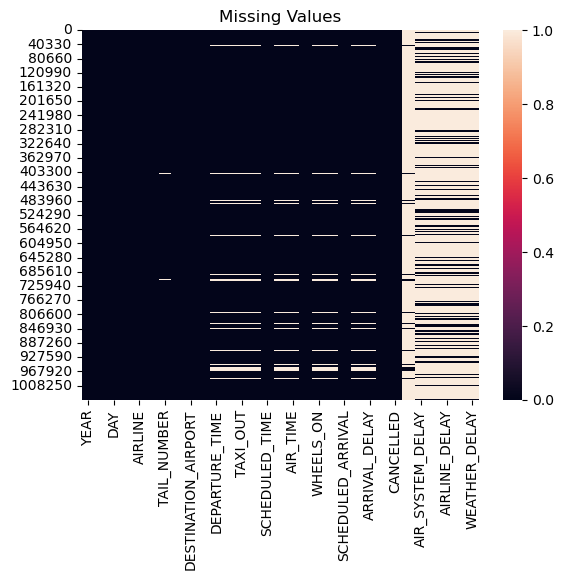

In [138]:
sns.heatmap(df.isnull())
plt.title("Missing Values")
plt.show()

<Axes: >

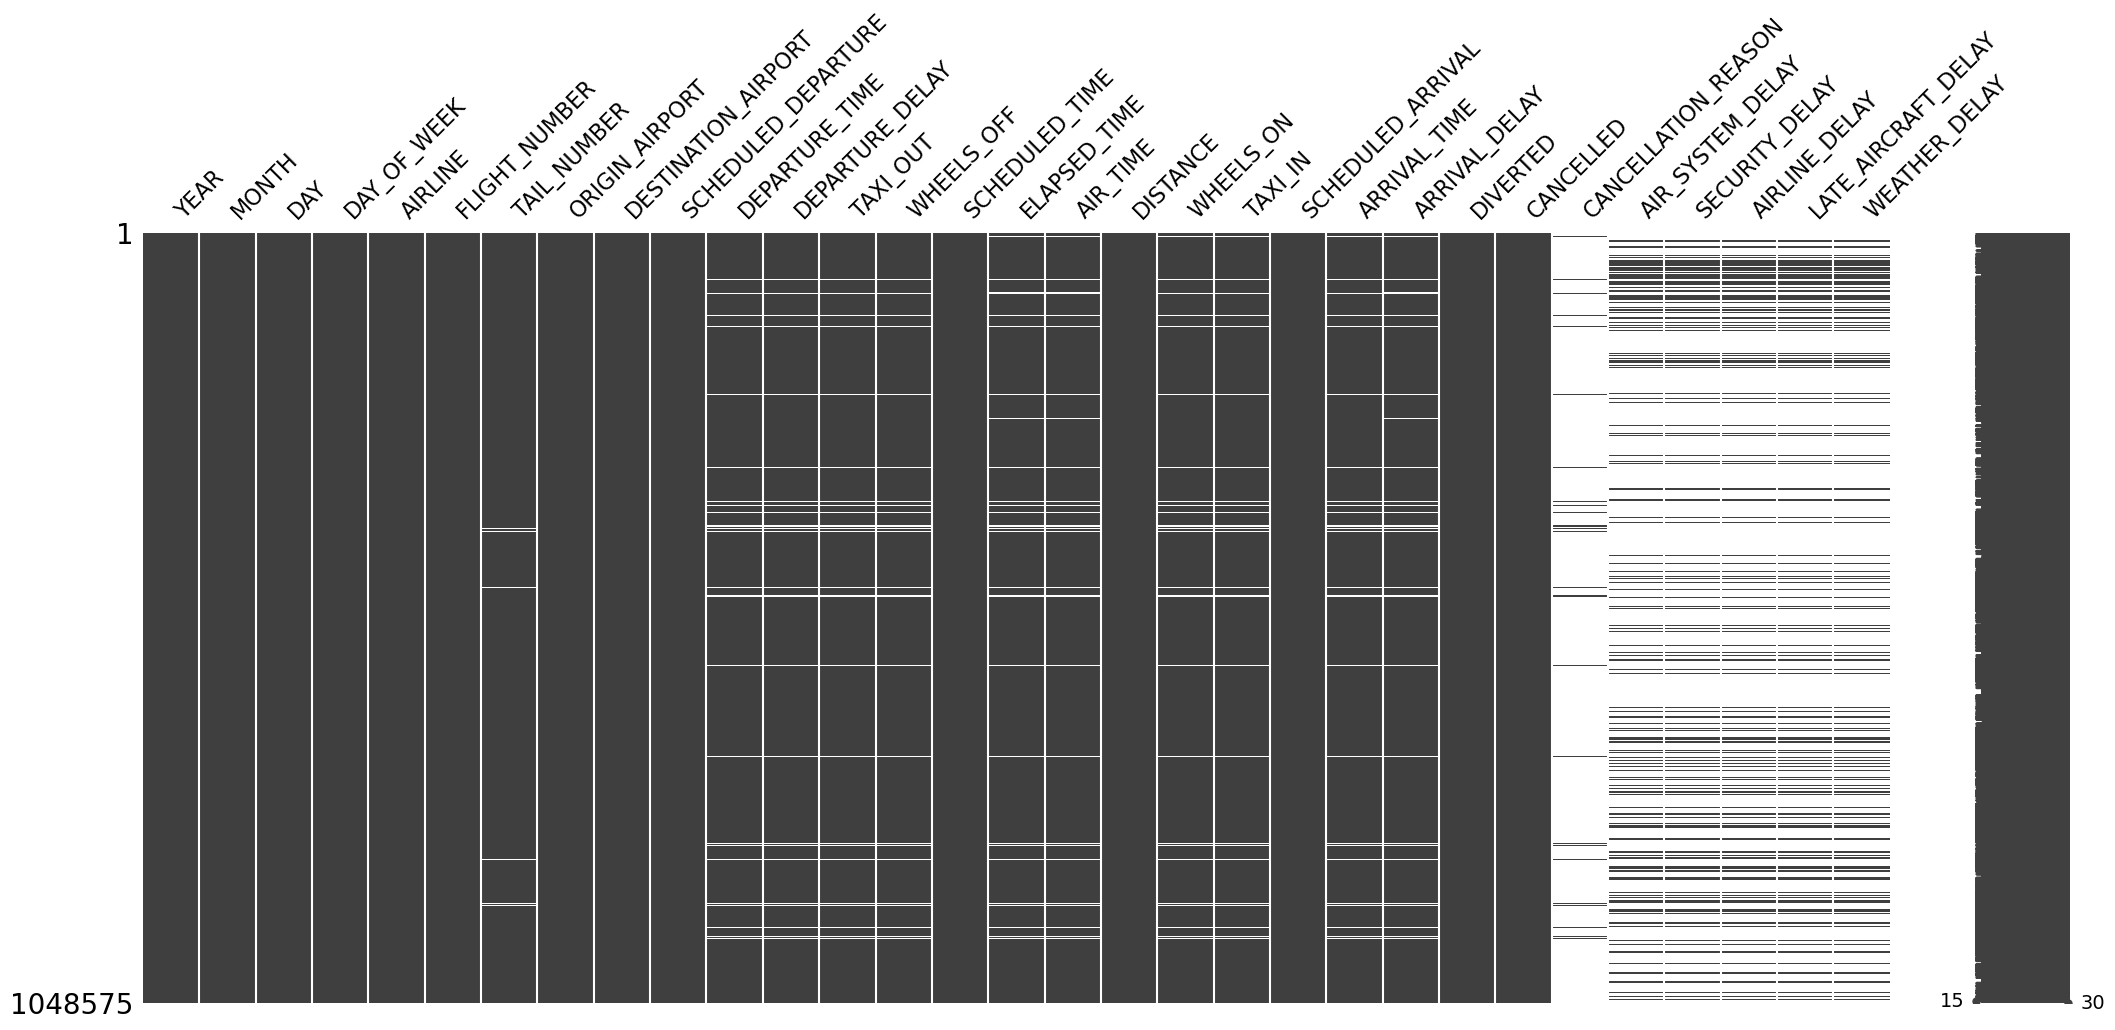

In [139]:
import missingno as msno
msno.matrix(df)

<Axes: >

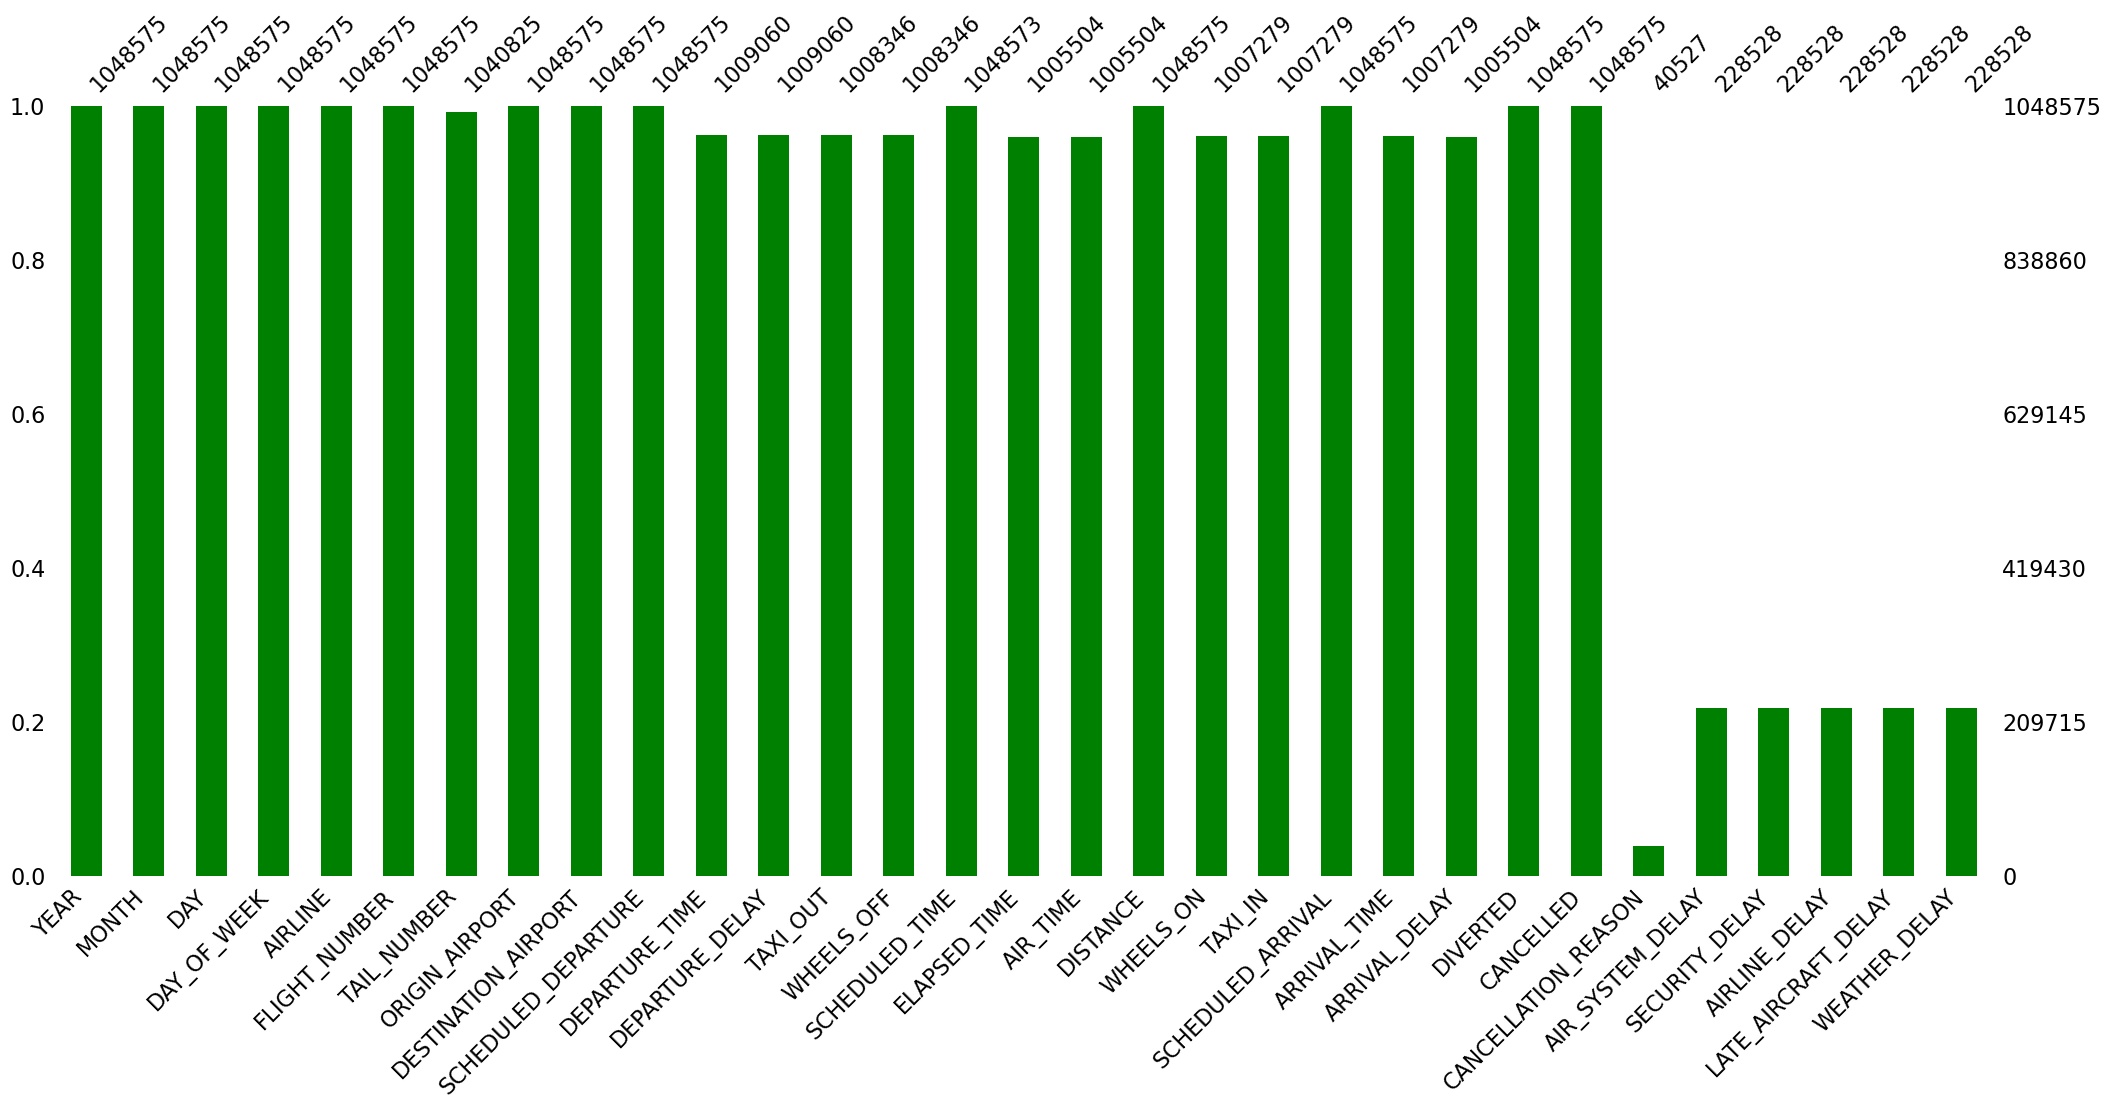

In [140]:
msno.bar(df, color='green')

In [141]:
# Numerical Data Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,1048575.0,2015.000000,0.000000,2015.0,2015.0,2015.0,2015.0,2015.0
MONTH,1048575.0,1.694297,0.705151,1.0,1.0,2.0,2.0,3.0
DAY,1048575.0,13.820969,8.725656,1.0,6.0,13.0,21.0,31.0
DAY_OF_WEEK,1048575.0,3.953196,1.999436,1.0,2.0,4.0,6.0,7.0
FLIGHT_NUMBER,1048575.0,2256.759063,1799.165837,1.0,755.0,1725.0,3485.0,9794.0
SCHEDULED_DEPARTURE,1048575.0,1322.631794,470.774829,1.0,920.0,1319.0,1720.0,2359.0
DEPARTURE_TIME,1009060.0,1333.704944,482.741534,1.0,928.0,1329.0,1731.0,2400.0
DEPARTURE_DELAY,1009060.0,11.334851,39.223721,-61.0,-5.0,-1.0,11.0,1988.0
TAXI_OUT,1008346.0,16.653802,10.070062,1.0,11.0,14.0,19.0,225.0
WHEELS_OFF,1008346.0,1357.381529,483.035110,1.0,944.0,1342.0,1745.0,2400.0


**Observation**
- Presence of missing data

In [142]:
# Categorical Data Statistics
df.describe(include=['bool', 'object'])

,AIRLINE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,CANCELLATION_REASON
count,1048575,1040825,1048575,1048575,40527
unique,14,4522,315,315,4
top,WN,N477HA,ATL,ATL,B
freq,221586,809,66599,66741,28260


In [143]:
# Check for duplicates
df.duplicated().sum()

0

- No duplicates

### Forecast

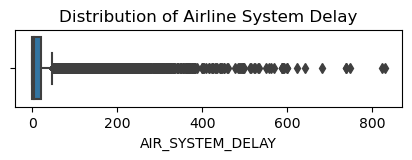

In [144]:
plt.figure(figsize=(5,1))
air_delay = sns.boxplot(data=df, x='AIR_SYSTEM_DELAY')
plt.title('Distribution of Airline System Delay')
plt.show() 

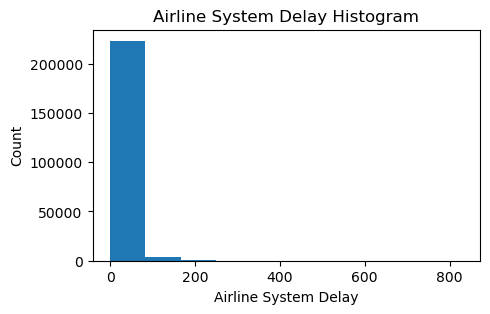

In [145]:
plt.figure(figsize=(5,3))
plt.hist(df['AIR_SYSTEM_DELAY'])
plt.xlabel('Airline System Delay')
plt.ylabel('Count')
plt.title('Airline System Delay Histogram');

In [146]:
delay_forecast = df[[
    'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'SCHEDULED_TIME','ELAPSED_TIME', 
    'AIR_TIME', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 
    'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'
]]

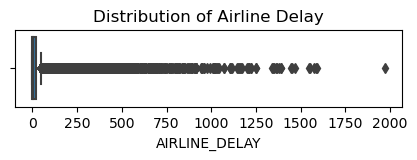

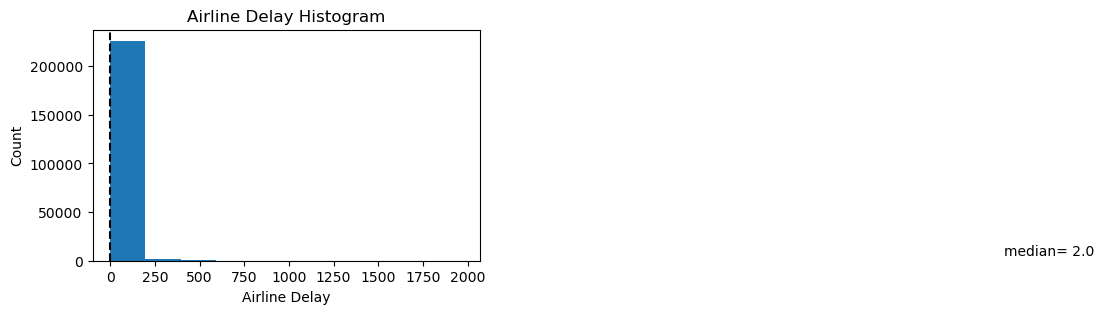

In [147]:
# sns.countplot(x='delay', data=df);
plt.figure(figsize=(5,1))
air_delay = sns.boxplot(data=df, x='AIRLINE_DELAY')
plt.title('Distribution of Airline Delay')
plt.show()

plt.figure(figsize=(5,3))
plt.hist(df['AIRLINE_DELAY'])
plt.xlabel('Airline Delay')
plt.ylabel('Count')
plt.title('Airline Delay Histogram');

median = df['AIRLINE_DELAY'].median()
plt.axvline(median, color='black', linestyle='--')
plt.text(5000, 5000, 'median= ' + str(median), color='black')
plt.show()

In [148]:
def plot_distribution(df, column, ax, bins_=50):
    """
    Plot variable distribution in a stacked histogram of DIVERTED or CANCELLED flights
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"DIVERTED": df[df["DIVERTED"]==0][column],
    "CANCELLED":df[df["CANCELLED"]==1][column]})
    # Plot the histogram
    temp[["DIVERTED","CANCELLED"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

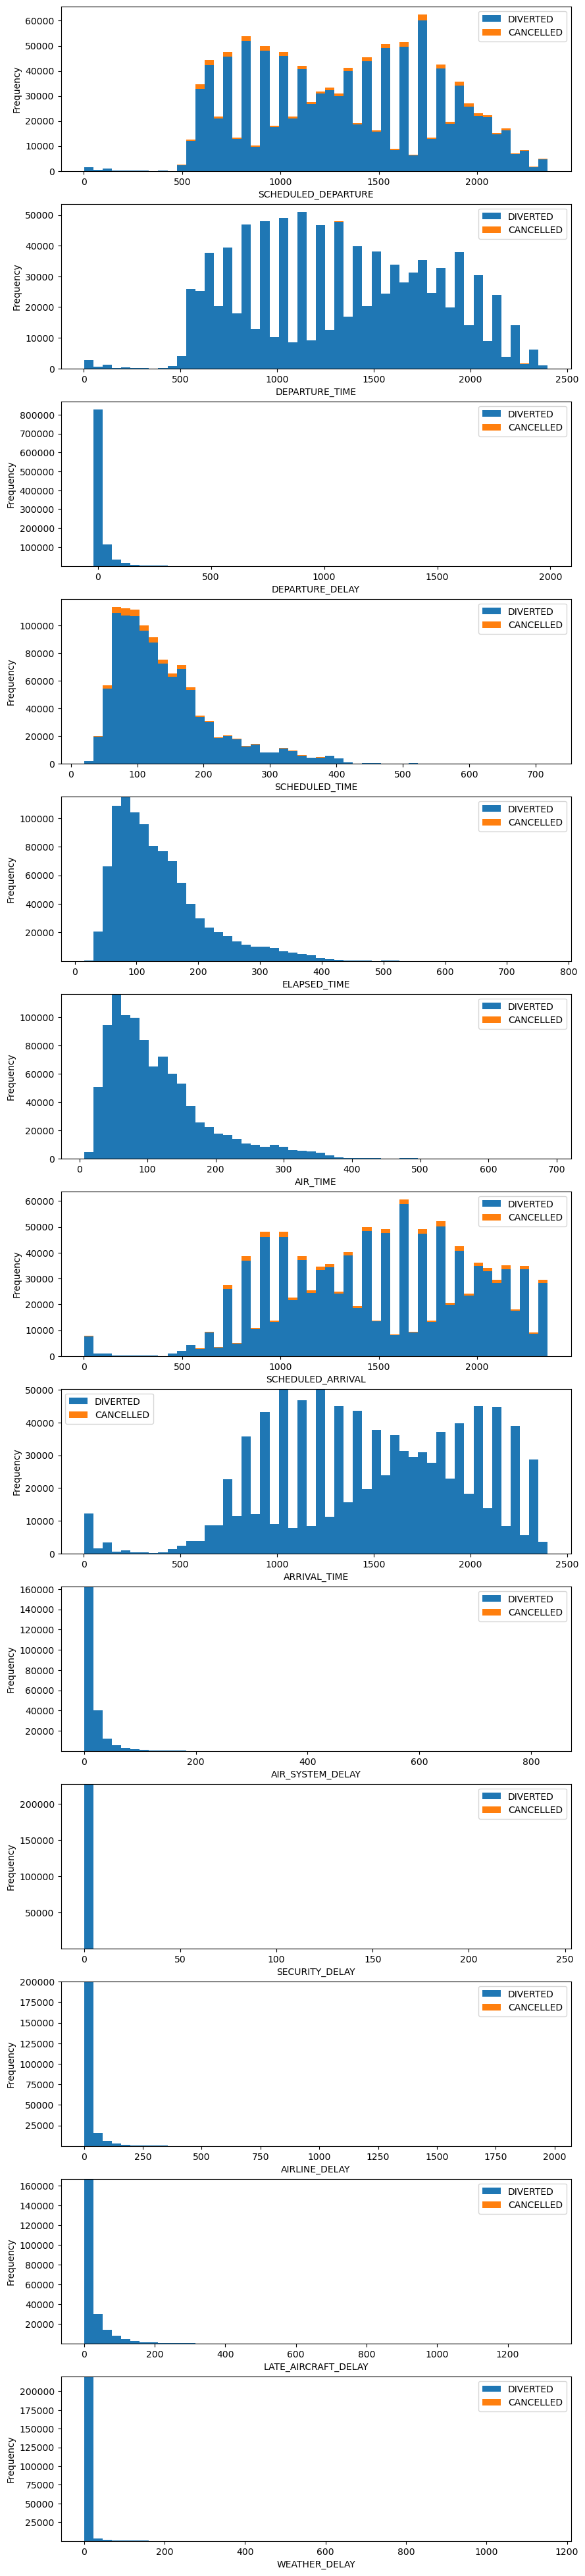

In [149]:
fig, axs = plt.subplots(nrows=13, figsize=(10,50))

# Plot histogram
plot_distribution(df, 'SCHEDULED_DEPARTURE', axs[0])
plot_distribution(df, 'DEPARTURE_TIME', axs[1])
plot_distribution(df, 'DEPARTURE_DELAY', axs[2])
plot_distribution(df, 'SCHEDULED_TIME', axs[3])
plot_distribution(df, 'ELAPSED_TIME', axs[4])
plot_distribution(df, 'AIR_TIME', axs[5])
plot_distribution(df, 'SCHEDULED_ARRIVAL', axs[6])
plot_distribution(df, 'ARRIVAL_TIME', axs[7])
plot_distribution(df, 'AIR_SYSTEM_DELAY', axs[8])
plot_distribution(df, 'SECURITY_DELAY', axs[9])
plot_distribution(df, 'AIRLINE_DELAY', axs[10])
plot_distribution(df, 'LATE_AIRCRAFT_DELAY', axs[11])
plot_distribution(df, 'WEATHER_DELAY', axs[12])

### Feature Engineering

In [150]:
# Drop non-impactful columns
df.drop('TAXI_OUT', axis=1, inplace=True)
df.drop('WHEELS_OFF', axis=1, inplace=True)
df.drop('WHEELS_ON', axis=1, inplace=True)
df.drop('TAXI_IN', axis=1, inplace=True)
df.drop('TAIL_NUMBER', axis=1, inplace=True)
df.drop('AIR_SYSTEM_DELAY', axis=1, inplace=True)
df.drop('SECURITY_DELAY', axis=1, inplace=True)
df.drop('AIRLINE_DELAY', axis=1, inplace=True)
df.drop('LATE_AIRCRAFT_DELAY', axis=1, inplace=True)
df.drop('WEATHER_DELAY', axis=1, inplace=True)
df.drop('CANCELLATION_REASON', axis=1, inplace=True)

In [151]:
round((df.isnull().mean() * 100), 2)

YEAR                   0.00
MONTH                  0.00
DAY                    0.00
DAY_OF_WEEK            0.00
AIRLINE                0.00
FLIGHT_NUMBER          0.00
ORIGIN_AIRPORT         0.00
DESTINATION_AIRPORT    0.00
SCHEDULED_DEPARTURE    0.00
DEPARTURE_TIME         3.77
DEPARTURE_DELAY        3.77
SCHEDULED_TIME         0.00
ELAPSED_TIME           4.11
AIR_TIME               4.11
DISTANCE               0.00
SCHEDULED_ARRIVAL      0.00
ARRIVAL_TIME           3.94
ARRIVAL_DELAY          4.11
DIVERTED               0.00
CANCELLED              0.00
dtype: float64

In [152]:
df.head(3)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
0,2015,1,1,4,AS,98,ANC,SEA,5,2354.0,-11.0,205.0,194.0,169.0,1448,430,408.0,-22.0,0,0
1,2015,1,1,4,AA,2336,LAX,PBI,10,2.0,-8.0,280.0,279.0,263.0,2330,750,741.0,-9.0,0,0
2,2015,1,1,4,US,840,SFO,CLT,20,18.0,-2.0,286.0,293.0,266.0,2296,806,811.0,5.0,0,0


### Impute Missing Values

In [153]:
# Depature Time using Median values
df['DEPARTURE_TIME'] = df['DEPARTURE_TIME'].fillna(df['DEPARTURE_TIME'].median())
df['SCHEDULED_DEPARTURE'].isnull().sum()

0

In [154]:
# Depature Delay using Median Values
df['DEPARTURE_DELAY'] = df['DEPARTURE_DELAY'].fillna(df['DEPARTURE_DELAY'].median())
df['DEPARTURE_DELAY'].isnull().sum()

0

In [155]:
# Impute data using Median Values
df['SCHEDULED_TIME'] = df['SCHEDULED_TIME'].fillna(df['SCHEDULED_TIME'].median())
df['SCHEDULED_TIME'].isnull().sum()

0

In [156]:
# Impute data using Median Values
df['ELAPSED_TIME'] = df['ELAPSED_TIME'].fillna(df['ELAPSED_TIME'].median())
df['ELAPSED_TIME'].isnull().sum()

0

In [157]:
# Impute data using Median Values
df['AIR_TIME'] = df['AIR_TIME'].fillna(df['AIR_TIME'].median())
df['AIR_TIME'].isnull().sum()

0

In [158]:
# Impute data using Median Values
df['ARRIVAL_TIME'] = df['ARRIVAL_TIME'].fillna(df['ARRIVAL_TIME'].median())
df['ARRIVAL_TIME'].isnull().sum()

0

In [159]:
# Impute data using Median Values
df['ARRIVAL_DELAY'] = df['ARRIVAL_DELAY'].fillna(df['ARRIVAL_DELAY'].median())
df['ARRIVAL_DELAY'].isnull().sum()

0

In [273]:
df.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'SCHEDULED_TIME', 'ELAPSED_TIME',
       'AIR_TIME', 'DISTANCE', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED'],
      dtype='object')

## Exploratory Data Analysis
- Consists of Univariate, Bivariate, Multivariate Analaysis, Statistics, etc.

### Univariate Data Analysis

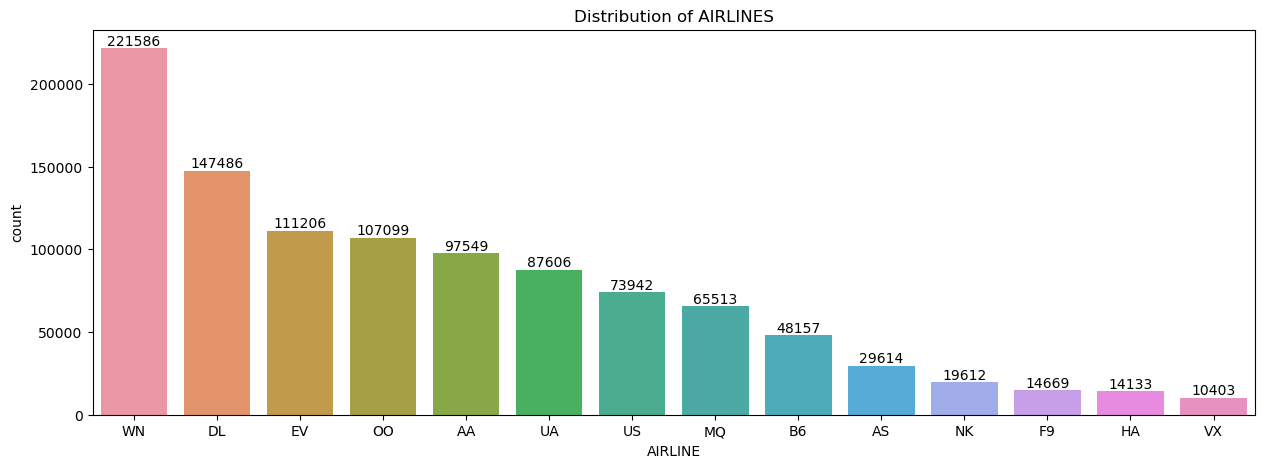

In [271]:
plt.figure(figsize=(15, 5))
airline = sns.countplot(x=df['AIRLINE'], order=df['AIRLINE'].value_counts(ascending=False).index)
airlineValues = df['AIRLINE'].value_counts(ascending=False).values
airline.bar_label(container=airline.containers[0], labels=airlineValues);
plt.title('Distribution of AIRLINES')
plt.show();

In [276]:
df.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'SCHEDULED_TIME', 'ELAPSED_TIME',
       'AIR_TIME', 'DISTANCE', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'DELAY_DEPATURE'],
      dtype='object')

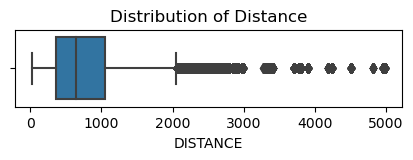

Text(0.5, 1.0, 'Histogram')

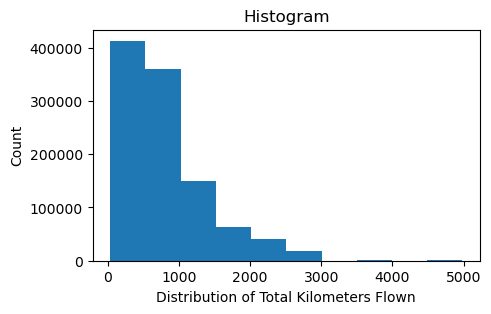

In [245]:
plt.figure(figsize=(5,1))
distance = sns.boxplot(data=df, x='DISTANCE')
plt.title('Distribution of Distance')
plt.show()

plt.figure(figsize=(5,3))
plt.hist(df['DISTANCE'])
plt.xlabel('Distribution of Total Kilometers Flown')
plt.ylabel('Count')
plt.title('Histogram')

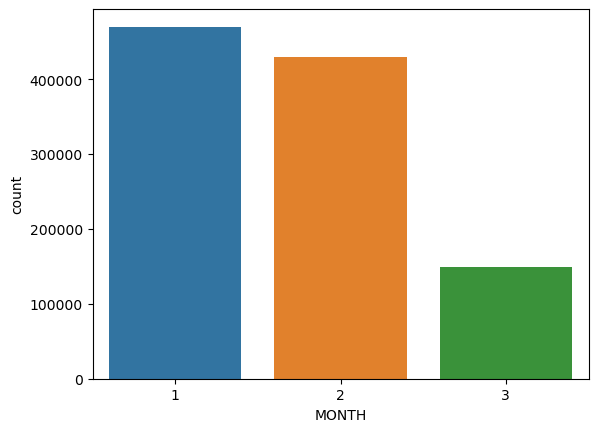

In [184]:
sns.countplot(x='MONTH', data=df);

- The first month had the highest flights compared to the second and third month.

### Diverted and Cancelled Flights

In [186]:
def plot_stacked_bars(df, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = df.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["DIVERTED", "CANCELLED"], loc=legend_)
    # Labels
    plt.ylabel("Airline base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

In [187]:
diverted = df[['AIRLINE', 'DIVERTED']]
diverted.columns = ['AIRLINE', 'DIVERTED']
diverted_total = diverted.groupby(diverted['DIVERTED']).count()
diverted_percentage = diverted_total / diverted_total.sum() * 100

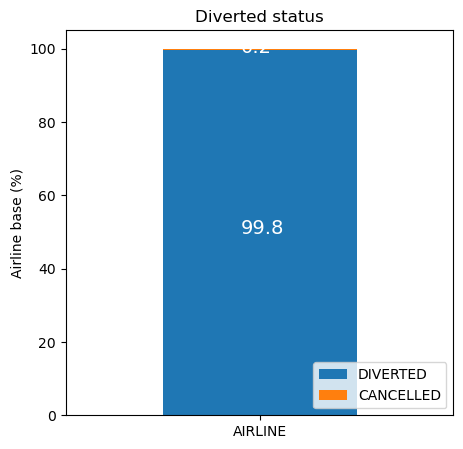

In [188]:
plot_stacked_bars(diverted_percentage.transpose(), "Diverted status", (5, 5), legend_="lower right")

- 99% of flights were DIVERTED with 0.2% flights CANCELLED.

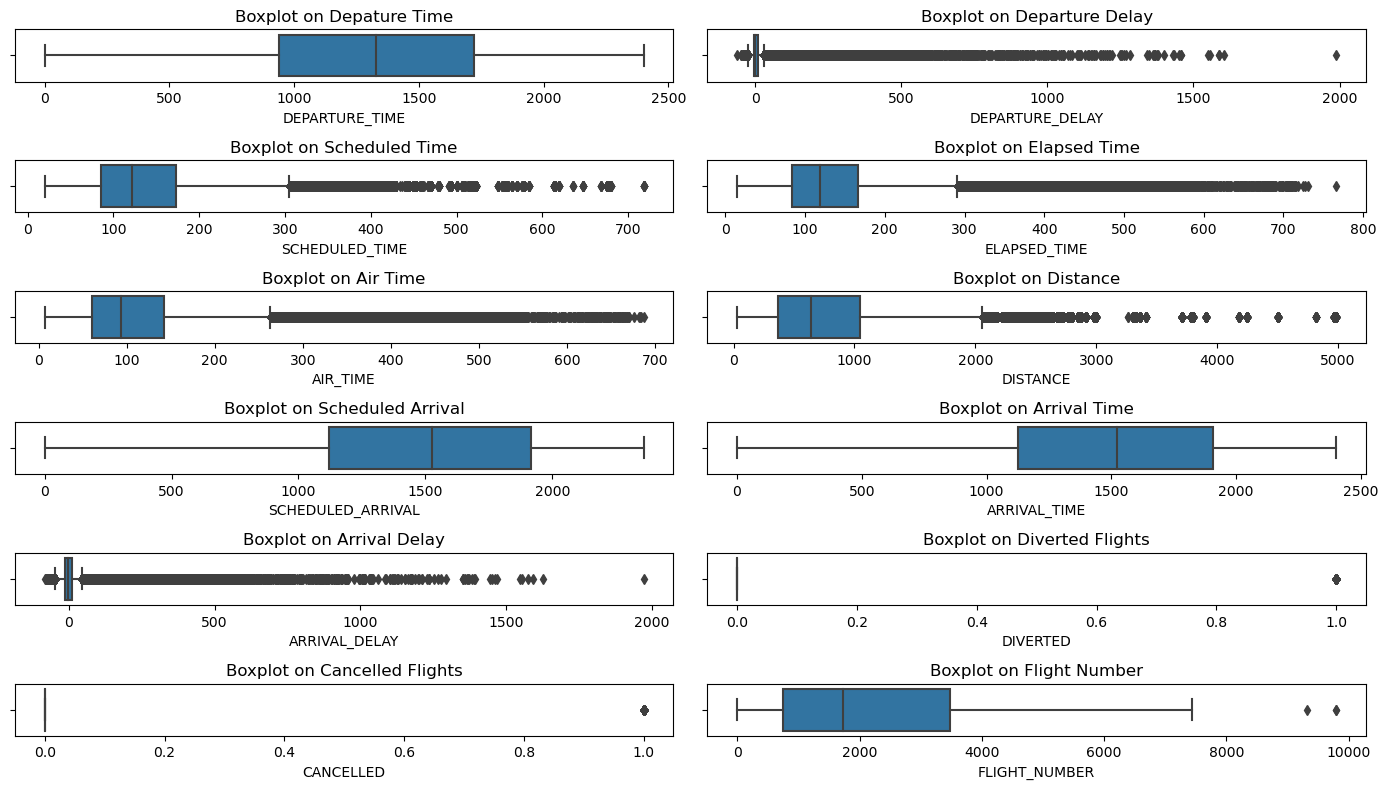

In [243]:
fig, axis = plt.subplots(6,2, figsize=(14,8))

sns.boxplot(x='DEPARTURE_TIME', data=df,  ax=axis[0,0])
axis[0,0].set_title("Boxplot on Depature Time")

sns.boxplot(x='DEPARTURE_DELAY', data=df, ax=axis[0,1])
axis[0,1].set_title("Boxplot on Departure Delay")

sns.boxplot(x='SCHEDULED_TIME', data=df, ax=axis[1,0])
axis[1,0].set_title('Boxplot on Scheduled Time')

sns.boxplot(x='ELAPSED_TIME', data=df, ax=axis[1,1])
axis[1,1].set_title('Boxplot on Elapsed Time')

sns.boxplot(x='AIR_TIME', data=df, ax=axis[2,0])
axis[2,0].set_title('Boxplot on Air Time')

sns.boxplot(x='DISTANCE', data=df, ax=axis[2,1])
axis[2,1].set_title('Boxplot on Distance')

sns.boxplot(x='SCHEDULED_ARRIVAL', data=df, ax=axis[3,0])
axis[3,0].set_title('Boxplot on Scheduled Arrival')

sns.boxplot(x='ARRIVAL_TIME', data=df, ax=axis[3,1])
axis[3,1].set_title('Boxplot on Arrival Time')

sns.boxplot(x='ARRIVAL_DELAY', data=df, ax=axis[4,0])
axis[4,0].set_title('Boxplot on Arrival Delay')

sns.boxplot(x='DIVERTED', data=df, ax=axis[4,1])
axis[4,1].set_title('Boxplot on Diverted Flights')

sns.boxplot(x='CANCELLED', data=df, ax=axis[5,0])
axis[5,0].set_title('Boxplot on Cancelled Flights')

sns.boxplot(x='FLIGHT_NUMBER', data=df, ax=axis[5,1])
axis[5,1].set_title('Boxplot on Flight Number')

plt.tight_layout();

- Presence of outliers in the following features: FLIGHT_NUMBER, DEPARTURE_DELAY, SCHEDULED_TIME, ELAPSED_TIME, AIR_TIME, DISTANCE, ARRIVAL_DELAY,DIVERTED, and CANCELLED.

### Bivariate Data Analysis

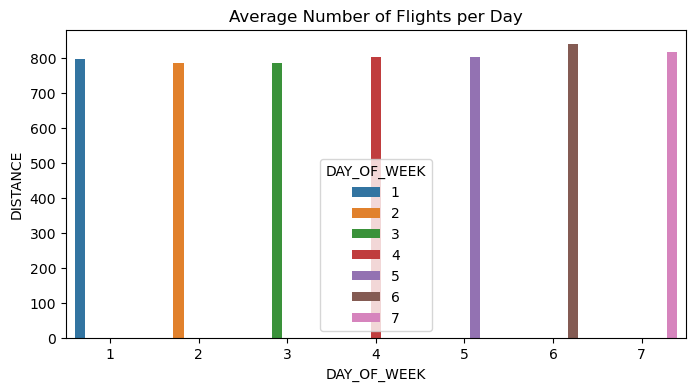

In [262]:
# Find frequency flights for each day of the week
day_flight = df.groupby('DAY_OF_WEEK')['DISTANCE'].mean().reset_index()
day_flight.columns = ['DAY_OF_WEEK', 'DISTANCE']
day_flight

plt.figure(figsize=(8,4))
sns.barplot(x='DAY_OF_WEEK', y='DISTANCE', data=day_flight, hue='DAY_OF_WEEK')
plt.title('Average Number of Flights per Day')
plt.show();

- Thursday's had the higest average number of distance  covered in Kilometers compared to other dates.

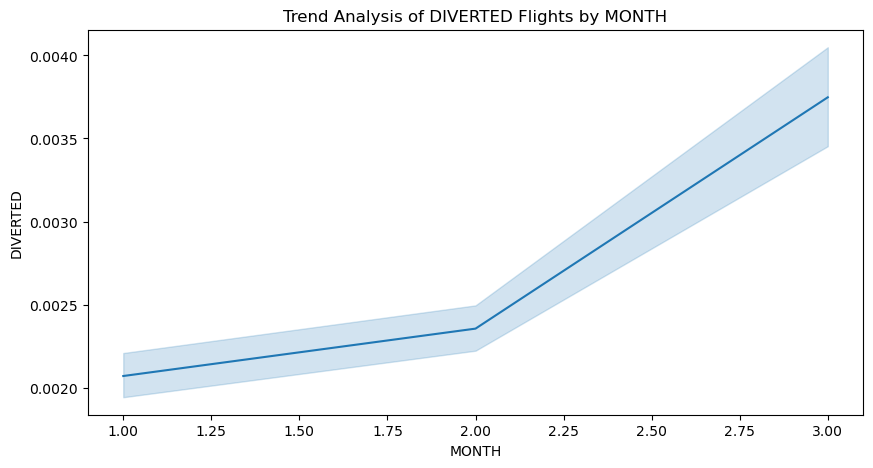

In [284]:
# Gives a trend line of Diverted Flights by Month
plt.figure(figsize=(10,5))

sns.lineplot(x='MONTH', y='DIVERTED', data=df)
plt.title('Trend Analysis of DIVERTED Flights by MONTH')
plt.show();

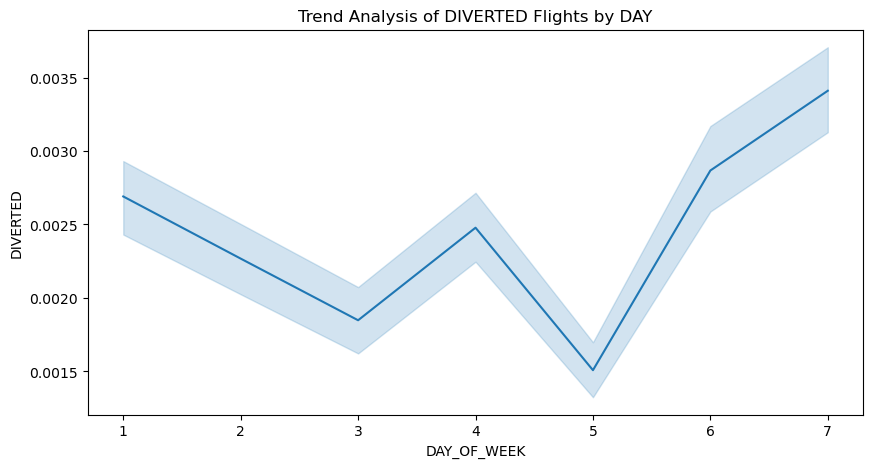

In [285]:
# Gives a trend line of Diverted Flights by Day of Week
plt.figure(figsize=(10,5))

sns.lineplot(x='DAY_OF_WEEK', y='DIVERTED', data=df)
plt.title('Trend Analysis of DIVERTED Flights by DAY')
plt.show();

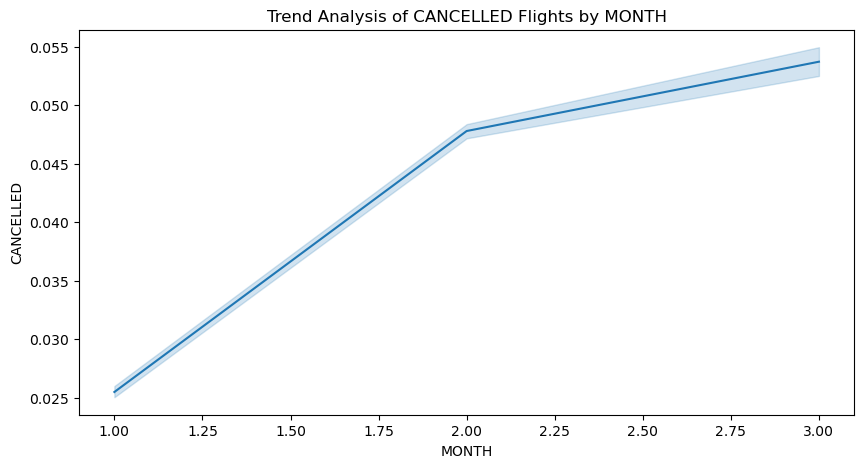

In [286]:
# Gives a trend line of Cancelled Flight by Month
plt.figure(figsize=(10,5))

sns.lineplot(x='MONTH', y='CANCELLED', data=df)
plt.title('Trend Analysis of CANCELLED Flights by MONTH')
plt.show();

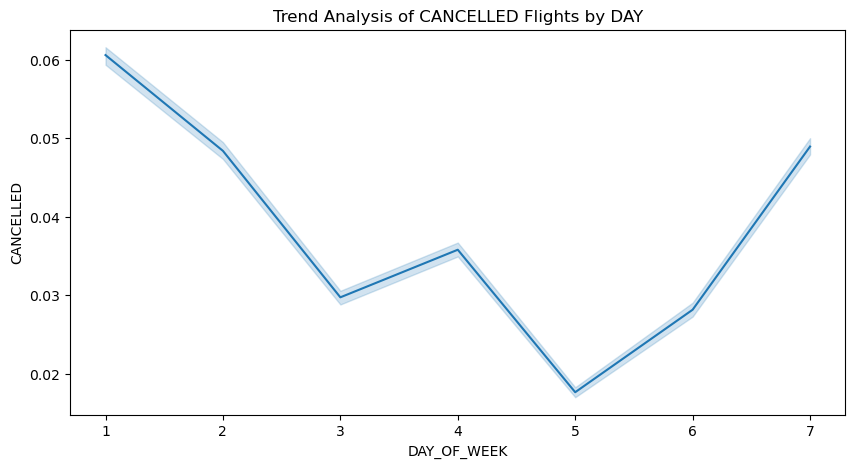

In [287]:
# Gives a trend line of Cancelled Flights by Day of week
plt.figure(figsize=(10,5))

sns.lineplot(x='DAY_OF_WEEK', y='CANCELLED', data=df)
plt.title('Trend Analysis of CANCELLED Flights by DAY')
plt.show();

### Multivariate Analysis

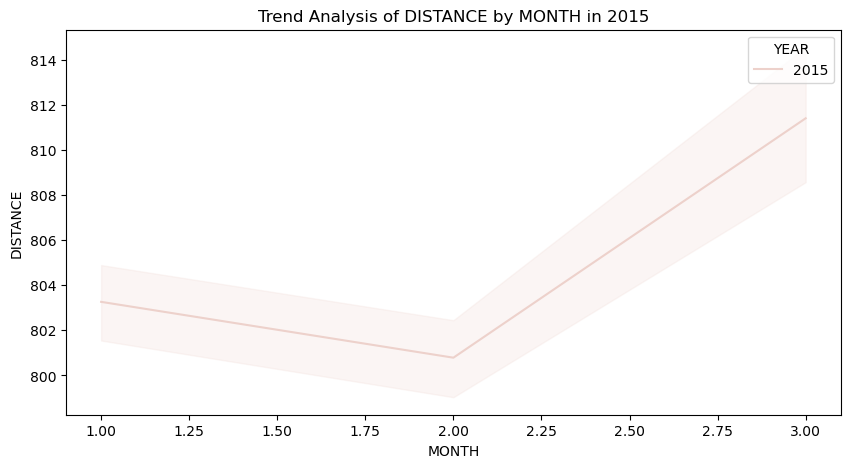

In [288]:
# Gives a trend line of Distance by Month in 2015
plt.figure(figsize=(10,5))

sns.lineplot(x='MONTH', y='DISTANCE', data=df, hue='YEAR')
plt.title('Trend Analysis of DISTANCE by MONTH in 2015')
plt.show();

- There was a significant drop in the number of Kilometers covered in the second month, with an increase towards the third month.

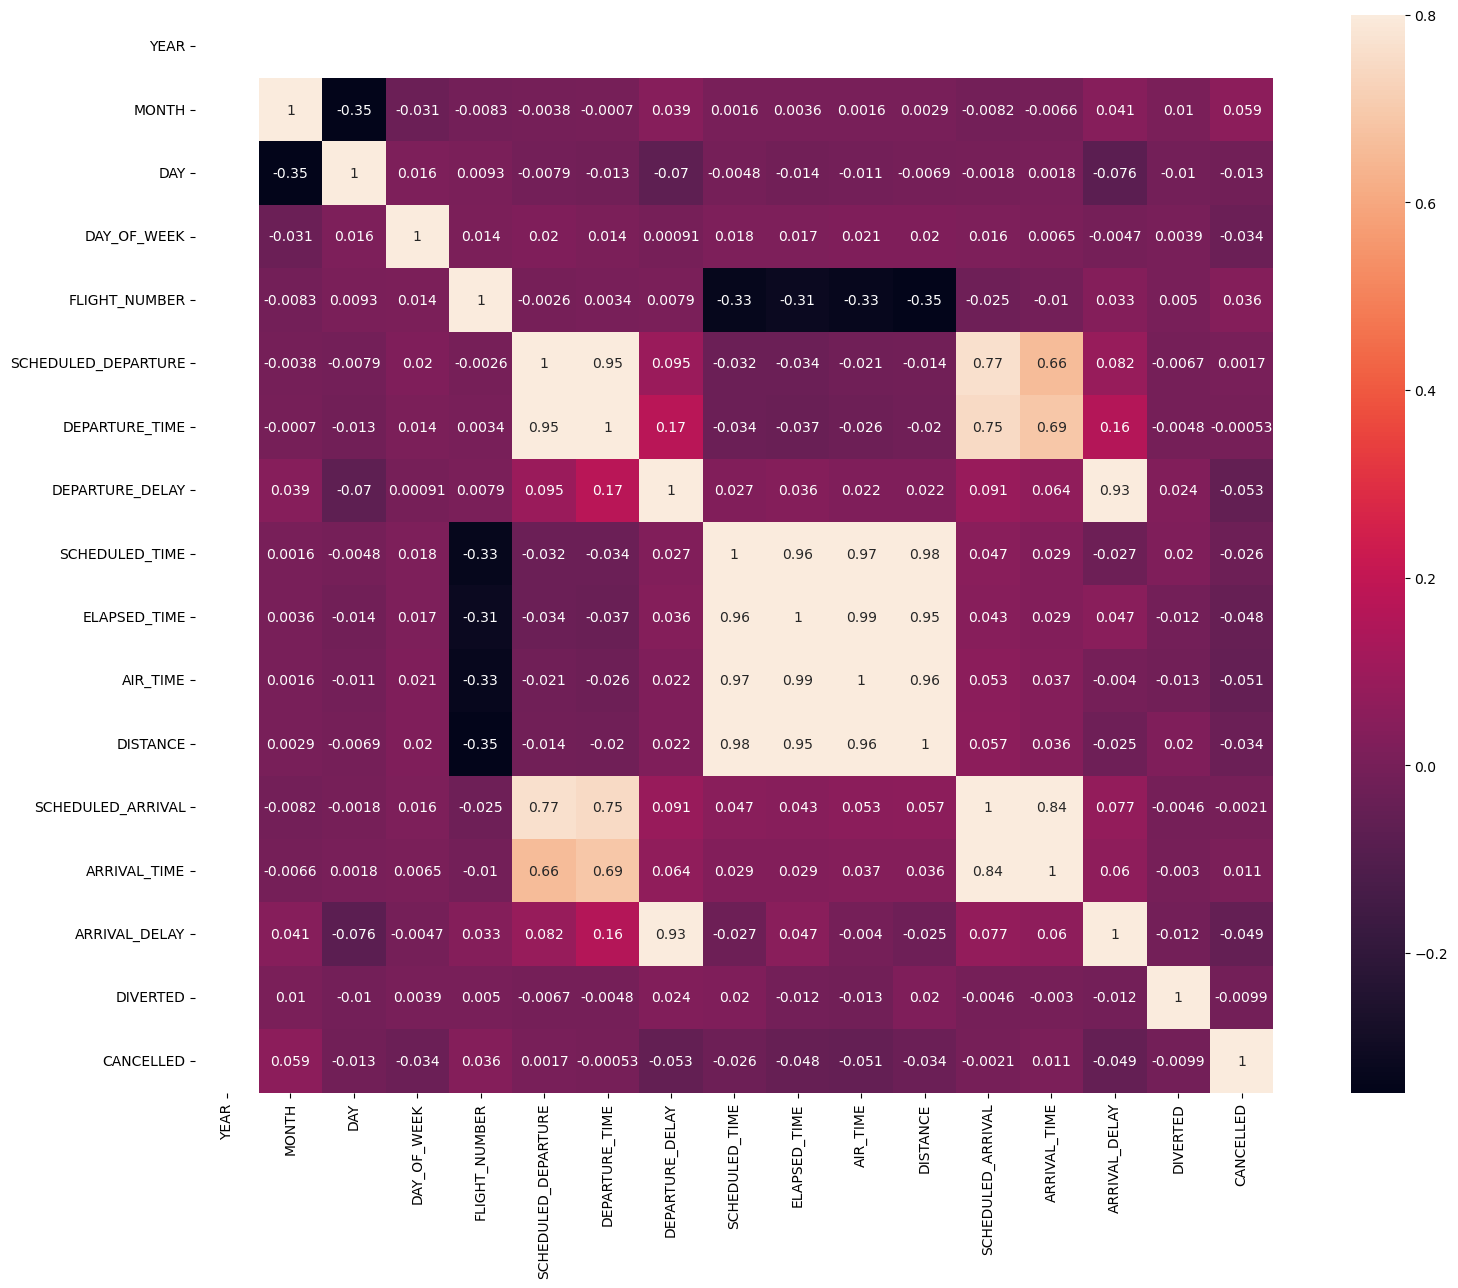

In [254]:
# Correlation - 
flight_corr = df.corr(numeric_only=True)
plt.figure(figsize=(20,14))
sns.heatmap(flight_corr, vmax=.8, square=True, annot=True);

### Data Normalization

In [160]:
# Impute data using Mode Values
# df['CANCELLATION_REASON'] = df['CANCELLATION_REASON'].fillna(df['CANCELLATION_REASON'].mode().iloc[0])
# df['CANCELLATION_REASON'].isnull().sum()

In [161]:
# # Impute data using Regression Model
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer
# from sklearn.linear_model import BayesianRidge

In [162]:
# # identify variables with missing data
# missing_vars = ['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']

# # identify variables to use as predictors
# predictor_vars = ['DEPARTURE_DELAY', 'AIR_TIME', 'DISTANCE', 'ARRIVAL_DELAY']

# # fit regression model using Bayesian Ridge
# imputer = IterativeImputer(estimator=BayesianRidge())

# # impute missing values
# imputed_data = imputer.fit_transform(df[predictor_vars + missing_vars])

# # substitute imputed values for missing values
# df[missing_vars] = imputed_data[:, -len(missing_vars):]


In [163]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

In [164]:
# # Split the dataset into two subsets: one with missing values and one without
# df_missing = df[df.isnull().any(axis=1)]
# df_complete = df.dropna()


# # Separate predictor variables (X) and target variable (y)
# X_cols = ['DEPARTURE_DELAY', 'AIR_TIME', 'DISTANCE', 'ARRIVAL_DELAY']  # Predictor variables
# y_cols = ['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']    # Target variable

# # Initialize a dictionary to store regression models for each target variable
# rm = {}

# # Train regression models for each target variable
# for y_col in y_cols:
#     X = df_complete[X_cols]
#     y = df_complete[y_col]
    
# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)    

# # Train the regression model
# lrm = LinearRegression()
# lrm.fit(X_train, y_train)

# # Store the trained regression model
# rm[y_col] = lrm


In [165]:
# # Predict missing values for each target variable
# for y_col in y_cols:
#     missing_values_predicted = rm[y_col].predict(df_missing[X_cols])
#     df.loc[df.isnull().any(axis=1), y_col] = missing_values_predicted

In [166]:
# # Evaluate imputation quality (optional)
# for y_col in y_cols:
#     y_pred = rm[y_col].predict(X_test)
#     mse = mean_squared_error(y_test, y_pred)
#     print("Mean Squared Error for", y_col, ":", mse)

# # Print the DataFrame with imputed values
# print(df)

In [167]:
# # Train the regression model
# regression_model = LinearRegression()
# regression_model.fit(X_train, y_train)

In [168]:
# Sum delays
# df['delay'] = df['AIRLINE_DELAY'] + df['AIR_SYSTEM_DELAY'] + df['DEPARTURE_DELAY'] + df['LATE_AIRCRAFT_DELAY'] + df['SECURITY_DELAY'] + df['WEATHER_DELAY']
# df.head()

In [169]:
# df['TIME_DIFF'] = df['ARRIVAL_TIME'] - df['DEPARTURE_TIME']
# df['TIME_DIFF'].head()

In [180]:
# df['CANCELLATION_REASON'].unique

In [181]:
# plt.figure(figsize=(5,1))
# cancellation_reason = sns.catplot(data=df, x='CANCELLATION_REASON')
# plt.title('Distribution of Airline Flight Cancellation')
# plt.show() 


In [ ]:
# plt.figure(figsize=(10, 4))
# sns.barplot(x=df.index, y=df['AIRLINE_DELAY'])
# plt.ylabel('Arrival delay (in minutes)')

In [ ]:
# Works with numerical values thus encoded should be done.
# sns.heatmap(data=df, annot=True)